# Càlcul numèric d'òrbites

## Llista de posicions orbitals

In [1]:
#
# Basic two-body orbit simularion written in julia
#
using PyPlot


# Universal gravitation constant
const G = 6.67e-11

infile = open("earth.dat")

#
# Read speed, position and mass of first body
#
linia = readline(infile)
pos = split(strip(linia), " ")
linia = readline(infile)
spd = split(strip(linia), " ")
mass = strip(readline(infile))

# Initialize and load position and velocity vectors
r1 = zeros(3,1)
v1 = zeros(3,1)
for i in 1:3
    r1[i] = parse(Float64,pos[i])
    v1[i] = parse(Float64,spd[i])
end
# Initialize mass
m1 = parse(Float64,mass)

#
# Read speed, position and mass of second body
#
linia = readline(infile)
pos = split(strip(linia), " ")
linia = readline(infile)
spd = split(strip(linia), " ")
mass = strip(readline(infile))

# Initialize and load position and velocity vectors
r2 = zeros(3,1)
v2 = zeros(3,1)
for i in 1:3
    r2[i] = parse(Float64,pos[i])
    v2[i] = parse(Float64,spd[i])
end
# Initialize mass
m2 = parse(Float64,mass)

# Time increment (in seconds) and number of steps
# will be a day.
linia = readline(infile)
times = split(strip(linia), " ")
nintv = parse(Int32,times[2])
dt    = parse(Float64,times[1])

close(infile)

# Newton's formula for gravitational force
function grav(r1,r2,m1,m2)
  r = norm(r1-r2)
  f1 = G * m1 * m2 * (r2 - r1) / r^3
  f2 = G * m1 * m2 * (r1 - r2) / r^3
  return f1,f2
end

# Newton's formula for acceleration
function accel(f,m)
  return f/m
end

# Matrices to contain the (x,y) coordinates computed for each iteration
# for bodies 1 and 2
C1 = zeros(nintv ,2)
C2 = zeros(nintv ,2)

# Compute the orbit position for each step
@sync for i in 1:nintv
    C1[i,1] = r1[1]
    C1[i,2] = r1[2]
    C2[i,1] = r2[1]
    C2[i,2] = r2[2]

    f1,f2 = grav(r1,r2,m1,m2)
    a1 = accel(f1,m1)
    a2 = accel(f2,m2)
    v1 = v1 + a1 * dt
    v2 = v2 + a2 * dt
    r1 = r1 + v1 * dt
    r2 = r2 + v2 * dt
    @printf("x=%+10.5e, y=%+10.5e, z=%+10.5e\n", r1[1],r1[2],r1[3])
    flush(STDOUT)
end

x=+1.49989e+11, y=+1.28123e+09, z=+0.00000e+00
x=+1.49967e+11, y=+2.56236e+09, z=+0.00000e+00
x=+1.49934e+11, y=+3.84330e+09, z=+0.00000e+00
x=+1.49890e+11, y=+5.12396e+09, z=+0.00000e+00
x=+1.49835e+11, y=+6.40425e+09, z=+0.00000e+00
x=+1.49769e+11, y=+7.68406e+09, z=+0.00000e+00
x=+1.49692e+11, y=+8.96332e+09, z=+0.00000e+00
x=+1.49604e+11, y=+1.02419e+10, z=+0.00000e+00
x=+1.49505e+11, y=+1.15198e+10, z=+0.00000e+00
x=+1.49395e+11, y=+1.27967e+10, z=+0.00000e+00
x=+1.49274e+11, y=+1.40728e+10, z=+0.00000e+00
x=+1.49142e+11, y=+1.53478e+10, z=+0.00000e+00
x=+1.49000e+11, y=+1.66217e+10, z=+0.00000e+00
x=+1.48846e+11, y=+1.78944e+10, z=+0.00000e+00
x=+1.48681e+11, y=+1.91658e+10, z=+0.00000e+00
x=+1.48505e+11, y=+2.04357e+10, z=+0.00000e+00
x=+1.48319e+11, y=+2.17042e+10, z=+0.00000e+00
x=+1.48121e+11, y=+2.29710e+10, z=+0.00000e+00
x=+1.47913e+11, y=+2.42362e+10, z=+0.00000e+00
x=+1.47694e+11, y=+2.54996e+10, z=+0.00000e+00
x=+1.47464e+11, y=+2.67611e+10, z=+0.00000e+00
x=+1.47223e+1

## Plotejat de les òrbites

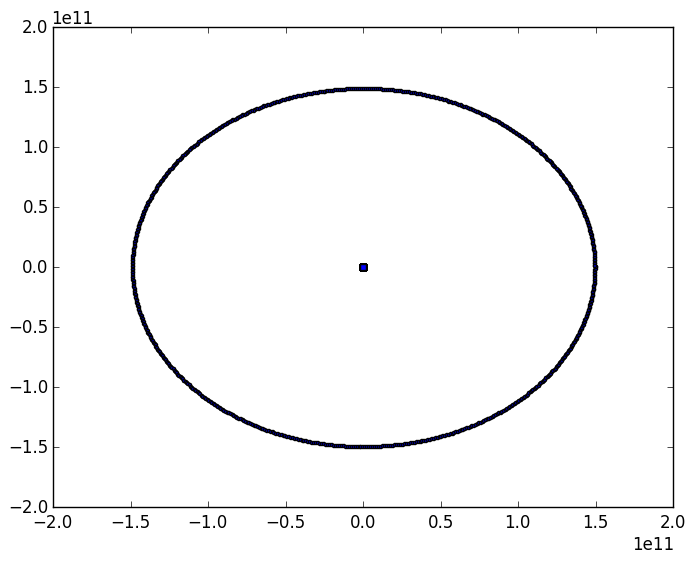

PyObject <matplotlib.collections.PathCollection object at 0x31c060d68>

In [3]:

# Plot both orbits
scatter(C1[1:nintv,1],C1[1:nintv,2],marker=".")
scatter(C2[1:nintv,1],C2[1:nintv,2],marker=",")


   ### Gravació del plot

In [4]:
savefig("orbit.png")


PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x31c078e48>)